In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imread
%matplotlib inline
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


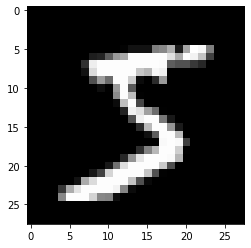

In [4]:
plt.imshow(X_train[0], cmap="gray")

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(4,4), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                                 
Total params: 46,634
Trainable params: 46,634
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [16]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), batch_size=10, callbacks=[early_stop])

Epoch 1/10
6000/6000 [==============================] - 55s 9ms/step - loss: 0.1505 - accuracy: 0.9563 - val_loss: 0.0607 - val_accuracy: 0.9800
Epoch 2/10
6000/6000 [==============================] - 49s 8ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 3/10
1098/6000 [====>.........................] - ETA: 41s - loss: 0.0375 - accuracy: 0.9881

KeyboardInterrupt: ignored

In [ ]:

# !pip install gradio
import gradio as gr


In [ ]:
def predict_image(img):
  img_3d=img.reshape(1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=str(np.argmax(prediction))
  return pred


In [ ]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 60ms/step
